<a href="https://colab.research.google.com/github/Insomnia2304/PMP-2024/blob/main/Lab10/Ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

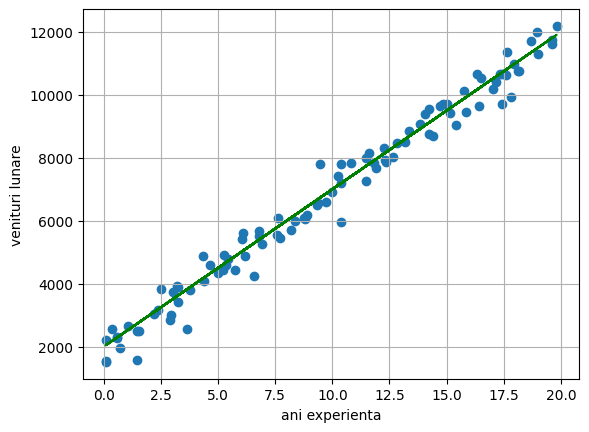

In [4]:
import numpy as np
import matplotlib.pyplot as plt

N = 100

alpha = 2000
beta = 500
eps = 400

x = np.random.uniform(0, 20, N)
sigma = np.random.normal(0, eps, N)

y = alpha + beta * x + sigma

plt.scatter(x, y)
plt.plot(x, beta * x + alpha, color="green")
plt.xlabel("ani experienta")
plt.ylabel("venituri lunare")
plt.grid()
plt.show()

Output()

Output()

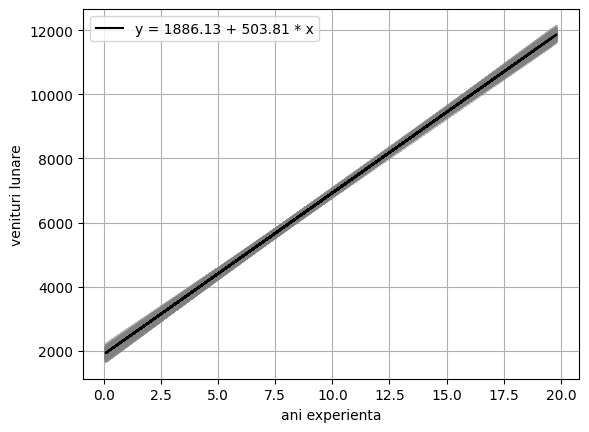

In [7]:
import pymc as pm
import arviz as az

with pm.Model() as model_g:
  alpha = pm.Normal('alpha', mu=0, sigma=1000)
  beta = pm.Normal('beta', mu=0, sigma=1000)
  epsilon = pm.HalfCauchy('epsilon', 5)
  mu = pm.Deterministic('mu', alpha + beta*x)

  y_pred = pm.Normal('y_pred', mu=mu, sigma=epsilon, observed=y)
  idata_g = pm.sample(2000, tune=2000, return_inferencedata=True)

posterior_g = idata_g.posterior.stack(samples={"chain", "draw"})
alpha_m = posterior_g['alpha'].mean().item()
beta_m = posterior_g['beta'].mean().item()
draws = range(0, posterior_g.samples.size, 10)
plt.plot(x, posterior_g['alpha'][draws].values + posterior_g['beta'][draws].values * np.array(x)[:,None], c='gray', alpha=0.5)
plt.plot(x, alpha_m + beta_m * np.array(x), c='k', label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')
plt.xlabel("ani experienta")
plt.ylabel("venituri lunare")
plt.legend()
plt.grid()
plt.show()